Maximum between-class variance threshold： 115


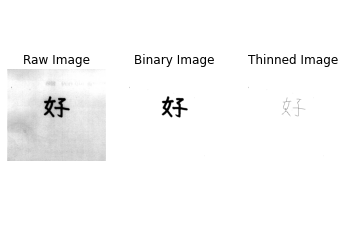

In [87]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


def gray(img): # RGB image to Gray level
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img [:,:,2].copy()
    gray_img = 0.2126*r+0.7152*g+0.0722*b
    gray_img = gray_img.astype(np.uint8)
    return gray_img

def get_threshold(gray_img):
    h = gray_img.shape[0]
    w = gray_img.shape[1]
    threshold_t = 0
    max_g = 0
    # Traverse every gray layer
    for t in range(255):
        # Use numpy to directly calculate the array
        n0 = gray_img[np.where(gray_img < t)]
        n1 = gray_img[np.where(gray_img>=t)]
        w0 = len(n0)/(h*w)
        w1 = len(n1)/(h*w)
        u0 = np.mean(n0) if len(n0)>0 else 0
        u1 = np.mean(n1) if len(n1)>0 else 0
    
        g = w0*w1*(u0-u1)**2 # calculate the variance
        if g > max_g :
            max_g = g
            threshold_t = t
    print ('Maximum between-class variance threshold：',threshold_t)
    #gray_img[gray_img<threshold_t] = 0
    #gray_img[gray_img>threshold_t] = 255
    return threshold_t

def otsu(img,threshold):
    img[img<threshold] = 0
    img[img>threshold] = 255
    return img
 

# Define the 8 neighbours of the selected pixel
#   P9 P2 P3
#   P8 P1 P4
#   P7 P6 P5
def neighbours(x, y, image):
    '''Return 8-neighbours of point p1 of picture, in order'''
    i = image
    x1, y1, x_1, y_1 = x + 1, y - 1, x - 1, y + 1
    # print ((x,y))
    return [i[y1][x], i[y1][x1], i[y][x1], i[y_1][x1],  # P2,P3,P4,P5
            i[y_1][x], i[y_1][x_1], i[y][x_1], i[y1][x_1]]  # P6,P7,P8,P9

# Calculate the number of 0-1 transtions in the ordered equence P2, P3, ... P9
def transitions(neighbours):
    n = neighbours + neighbours[0:1]  # n = P2, ... P9, P2
    return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:])) # zip(n, n[1:]) = [(P2, P3), (P3, P4), ... (P9, P2)]

def Two_steps(image):
    step1 = step2 = [(-1, -1)]
    # Repeat the steps until there is no more changing
    while step1 or step2:
        # Step 1  label all points fitting all the conditions
        step1 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and         # (Condition 0)
                        P4 * P6 * P8 == 0 and    # Condition 4
                        P2 * P4 * P6 == 0 and    # Condition 3
                        transitions(n) == 1 and  # Condition 2
                        2 <= sum(n) <= 6):       # Condition 1
                    step1.append((x, y))
        # Delete all points in step1
        for x, y in step1: image[y][x] = 0
        # Step 2 label all points fitting all the conditions
        step2 = []
        for y in range(1, len(image) - 1):
            for x in range(1, len(image[0]) - 1):
                P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(x, y, image)
                if (image[y][x] == 1 and         # (Condition 0)
                        P2 * P6 * P8 == 0 and    # Condition 4
                        P2 * P4 * P8 == 0 and    # Condition 3
                        transitions(n) == 1 and  # Condition 2
                        2 <= sum(n) <= 6):       # Condition 1
                    step2.append((x, y))
        # Delete all points in step2
        for x, y in step2: image[y][x] = 0
    return image

# Use the thin algorithm
def thin(img):
    a = np.array(img)
    for i in range(np.size(a, 0)):
        for j in range(np.size(a, 1)):
            if a[i][j] == 0:
                a[i][j] = 1
            else:
                a[i][j] = 0
    after = Two_steps(a)
    for i in range(np.size(after, 0)):
        for j in range(np.size(after, 1)):
            if after[i][j] == 1:
                after[i][j] = 0
            else:
                after[i][j] = 255
    return after



if __name__ == '__main__':
    img = cv2.imread('img6.bmp')
    imgraw = img.copy()
    gray_img = gray(img) 
    threshold=get_threshold(gray_img)
    #print (threshold)
    otsu_img = otsu(gray_img,threshold)
    thin_img = thin(otsu_img)
  
    
    
    figure = plt.figure()  
    plt.axis("off")
    ax = figure.add_subplot(131) 
    plt.axis('off')
    ax.imshow(imgraw,cmap='gray')
    ax.set_title('Raw Image')
    ax = figure.add_subplot(132) 
    plt.axis('off')
    ax.imshow(otsu_img,cmap='gray') 
    ax.set_title('Binary Image')
    ax = figure.add_subplot(133) 
    plt.axis('off')
    ax.imshow(thin_img,cmap='gray') 
    ax.set_title('Thinned Image')
    #plt.savefig('Img6_After.jpg')
    plt.show()
    


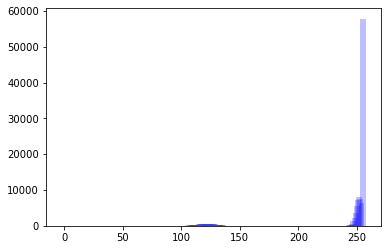

<ipython-input-76-7a4645448499>:54: RuntimeWarning: invalid value encountered in double_scalars
  return m/float(w)


optimal threshold 189


<ipython-input-76-7a4645448499>:117: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("otsu.jpg" ,cmap="gray")


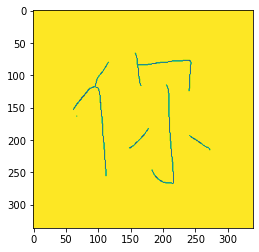